In [1]:
#importo la libreria pandas
import pandas as pd

In [2]:
#importo il dataset sul covid
dati_covid=pd.read_csv('owid-covid-data.csv')

In [3]:
#visualizzo il dataset
dati_covid

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
388904      ZWE    Africa     Zimbabwe  2024-03-20     266359.0        0.0   
388905      ZWE    Africa     Zimbabwe  2024-03-21     266359.0        0.0   
388906      ZWE    Africa     Zimbabwe  2024-03-22     266359.0        0.0   
388907      ZWE    Africa     Zimbabwe  2024-03-23     266359.0        0.0   
388908      ZWE    Africa     Zimbabwe  2024-03-24     266359.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
388904                 0.0        5740.0         0.0                  0.0   
388905                 0.0        5740.0         0.0                  0.0   
388906                 0.0        5740.0         0.0                  0.0   
388907                 0.0        5740.0         0.0                  0.0   
388908                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
388904  ...          30.7                  36.791                         1.7   
388905  ...          30.7                  36.791                         1.7   
388906  ...          30.7                  36.791                         1.7   
388907  ...          30.7                  36.791                         1.7   
388908  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
388904            61.49                    0.571  16320539.0   
388905            61.49                    0.571  16320539.0   
388906            61.49                    0.571  16320539.0   
388907            61.49                    0.571  16320539.0   
388908            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

Si richiede di verificare le dimensioni del dataset e i relativi metadati;

In [4]:
#verifico le dimensioni del dataset
dati_covid.shape

(388909, 67)

In [5]:
#verifico i metadati
dati_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388909 entries, 0 to 388908
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    388909 non-null  object 
 1   continent                                   370325 non-null  object 
 2   location                                    388909 non-null  object 
 3   date                                        388909 non-null  object 
 4   total_cases                                 350041 non-null  float64
 5   new_cases                                   377974 non-null  float64
 6   new_cases_smoothed                          376744 non-null  float64
 7   total_deaths                                327775 non-null  float64
 8   new_deaths                                  378290 non-null  float64
 9   new_deaths_smoothed                         377060 non-null  float64
 

Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [6]:
#esploro la lista dei continenti 
lista_continenti=dati_covid['continent'].unique()
print(lista_continenti)

['Asia' nan 'Europe' 'Africa' 'Oceania' 'North America' 'South America']


In [7]:
#creazione del nuovo dataset per la pulizia dei dati
dati_covid_new=dati_covid
dati_covid_new.loc[dati_covid_new['location'].isin(lista_continenti),'continent']=dati_covid_new['location']

In [8]:
#lista continenti nuovo dataset
dati_covid_new['continent'].unique()

array(['Asia', 'Africa', 'Europe', 'Oceania', 'North America',
       'South America', nan], dtype=object)

In [9]:
#dataset pulito
thesame=dati_covid_new.query('location == continent')
thesame

iso_code      continent       location        date  total_cases  \
1541    OWID_AFR         Africa         Africa  2020-01-05          NaN   
1542    OWID_AFR         Africa         Africa  2020-01-06          NaN   
1543    OWID_AFR         Africa         Africa  2020-01-07          NaN   
1544    OWID_AFR         Africa         Africa  2020-01-08          NaN   
1545    OWID_AFR         Africa         Africa  2020-01-09          NaN   
...          ...            ...            ...         ...          ...   
324678  OWID_SAM  South America  South America  2024-03-20   68841873.0   
324679  OWID_SAM  South America  South America  2024-03-21   68841873.0   
324680  OWID_SAM  South America  South America  2024-03-22   68841873.0   
324681  OWID_SAM  South America  South America  2024-03-23   68841873.0   
324682  OWID_SAM  South America  South America  2024-03-24   68842898.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
1541          0.0                 NaN           NaN         0.0   
1542          0.0                 NaN           NaN         0.0   
1543          0.0                 NaN           NaN         0.0   
1544          0.0                 NaN           NaN         0.0   
1545          0.0                 NaN           NaN         0.0   
...           ...                 ...           ...         ...   
324678        0.0            1356.857     1354062.0         0.0   
324679        0.0            1356.857     1354062.0         0.0   
324680        0.0            1356.857     1354062.0         0.0   
324681        0.0            1356.857     1354062.0         0.0   
324682     1025.0             146.429     1354066.0         4.0   

        new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
1541                    NaN  ...           NaN                     NaN   
1542                    NaN  ...           NaN                     NaN   
1543                    NaN  ...           NaN                     NaN   
1544                    NaN  ...           NaN                     NaN   
1545                    NaN  ...           NaN                     NaN   
...                     ...  ...           ...                     ...   
324678                5.143  ...           NaN                     NaN   
324679                5.143  ...           NaN                     NaN   
324680                5.143  ...           NaN                     NaN   
324681                5.143  ...           NaN                     NaN   
324682                0.571  ...           NaN                     NaN   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
1541                           NaN              NaN                      NaN   
1542                           NaN              NaN                      NaN   
1543                           NaN              NaN                      NaN   
1544                           NaN              NaN                      NaN   
1545                           NaN              NaN                      NaN   
...                            ...              ...                      ...   
324678                         NaN              NaN                      NaN   
324679                         NaN              NaN                      NaN   
324680                         NaN              NaN                      NaN   
324681                         NaN              NaN                      NaN   
324682                         NaN              NaN                      NaN   

          population  excess_mortality_cumulative_absolute  \
1541    1.426737e+09                                   NaN   
1542    1.426737e+09                                   NaN   
1543    1.426737e+09                                   NaN   
1544    1.426737e+09                                   NaN   
1545    1.426737e+09                                   NaN   
...              ...                                   ...   
324678  4.368167e+

In [10]:
#conteggio casi totali per continente,eliminado gli eventuali dati nulli
casi_per_continente = dati_covid_new.groupby('continent')['total_cases'].max().dropna()
print("Casi totali per continente:")
print(casi_per_continente)

Casi totali per continente:
continent
Africa            13139988.0
Asia             301386370.0
Europe           252417184.0
North America    124525138.0
Oceania           14814237.0
South America     68842898.0
Name: total_cases, dtype: float64


In [11]:
#somma dei casi dei continenti
casi_per_continente.sum()

775125815.0

Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [12]:
#variabili contenenti i nomi di contineti
continente_1 = "Europe"
continente_2 = "Asia"

#filtraggio del ds
statistiche_continente_1 = dati_covid[dati_covid_new['continent'] == continente_1]['total_cases']
statistiche_continente_2 = dati_covid[dati_covid_new['continent'] == continente_2]['total_cases']

casi_totali_mondo = dati_covid_new['total_cases'].sum()

#calcolo dei descrittori statistici per i casi totali nei due continenti
max_europa = statistiche_continente_1.max()
max_asia = statistiche_continente_2.max()
mean_europa = statistiche_continente_1.mean()
mean_asia = statistiche_continente_2.mean()

#calcolo la percentuale dei casi totali per ogni continente
percentuale_europa = (statistiche_continente_1.sum() / casi_totali_mondo) * 100
percentuale_asia = (statistiche_continente_2.sum() / casi_totali_mondo) * 100

#risultati
print("Statistiche per Europa:")
print("Massimo:", max_europa)
print("Media:", mean_europa)
print("Percentuale rispetto al mondo:", percentuale_europa)
print( )

print("Statistiche per Asia:")
print("Massimo:", max_asia)
print("Media:", mean_asia)
print("Percentuale rispetto al mondo:", percentuale_asia)



Statistiche per Europa:
Massimo: 252417184.0
Media: 5253176.101750575
Percentuale rispetto al mondo: 15.65105864316742

Statistiche per Asia:
Massimo: 301386370.0
Media: 6254082.286759068
Percentuale rispetto al mondo: 16.338240197876072


Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

In [13]:
#dati relativi all' Italia nel 2022
Italia_2022=dati_covid_new[(dati_covid_new['location']=='Italy') & (dati_covid_new['date'].str.startswith('2022'))].copy()
Italia_2022

iso_code continent location        date  total_cases  new_cases  \
167070      ITA    Europe    Italy  2022-01-01    5622431.0        0.0   
167071      ITA    Europe    Italy  2022-01-02    6267035.0   644604.0   
167072      ITA    Europe    Italy  2022-01-03    6267035.0        0.0   
167073      ITA    Europe    Italy  2022-01-04    6267035.0        0.0   
167074      ITA    Europe    Italy  2022-01-05    6267035.0        0.0   
...         ...       ...      ...         ...          ...        ...   
167430      ITA    Europe    Italy  2022-12-27   25060503.0        0.0   
167431      ITA    Europe    Italy  2022-12-28   25060503.0        0.0   
167432      ITA    Europe    Italy  2022-12-29   25060503.0        0.0   
167433      ITA    Europe    Italy  2022-12-30   25060503.0        0.0   
167434      ITA    Europe    Italy  2022-12-31   25060503.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
167070           36797.000      136530.0         0.0              140.857   
167071           92086.286      137513.0       983.0              140.429   
167072           92086.286      137513.0         0.0              140.429   
167073           92086.286      137513.0         0.0              140.429   
167074           92086.286      137513.0         0.0              140.429   
...                    ...           ...         ...                  ...   
167430           18918.143      184168.0         0.0              114.000   
167431           18918.143      184168.0         0.0              114.000   
167432           18918.143      184168.0         0.0              114.000   
167433           18918.143      184168.0         0.0              114.000   
167434           18918.143      184168.0         0.0              114.000   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
167070  ...          27.8                     NaN                        3.18   
167071  ...          27.8                     NaN                        3.18   
167072  ...          27.8                     NaN                        3.18   
167073  ...          27.8                     NaN                        3.18   
167074  ...          27.8                     NaN                        3.18   
...     ...           ...                     ...                         ...   
167430  ...          27.8                     NaN                        3.18   
167431  ...          27.8                     NaN                        3.18   
167432  ...          27.8                     NaN                        3.18   
167433  ...          27.8                     NaN                        3.18   
167434  ...          27.8                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
167070            83.51                    0.892  59037472.0   
167071            83.51                    0.892  59037472.0   
167072            83.51                    0.892  59037472.0   
167073            83.51                    0.892  59037472.0   
167074            83.51                    0.892  59037472.0   
...                 ...                      ...         ...   
167430            83.51                    0.892  59037472.0   
167431            83.51                    0.892  59037472.0   
167432            83.51                    0.892  59037472.0   
167433            83.51                    0.892  59037472.0   
167434            83.51                    0.892  59037472.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
167070                                   NaN                          NaN   
167071                              168226.3                        12.99   
167072                                   NaN                          NaN   
167073                                   NaN                          NaN   
167074                                   NaN                      

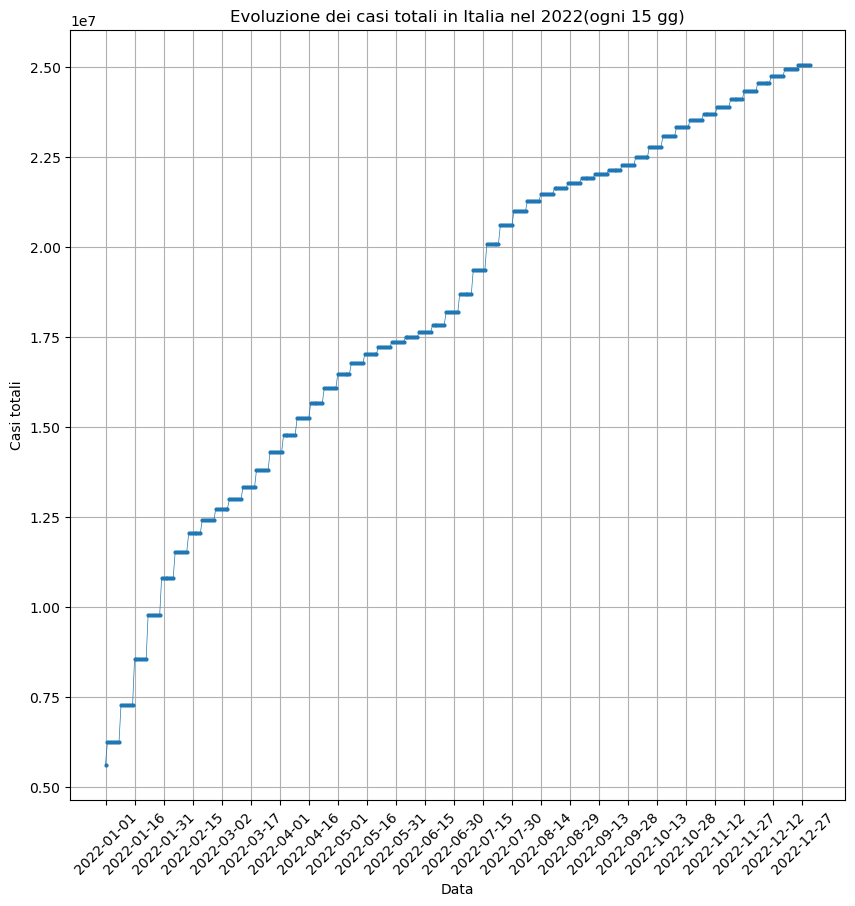

In [14]:
#grafico relativo all' Italia nel 2022
import matplotlib.pyplot as plt

#grafico sull' evoluzione dei casi totali nell' anno 2022
plt.figure(figsize=(10, 10))
plt.plot(Italia_2022['date'], Italia_2022['total_cases'], marker='o', linestyle='-', markersize=2, linewidth=0.5)
plt.title('Evoluzione dei casi totali in Italia nel 2022(ogni 15 gg)')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.xticks(Italia_2022['date'][::15],rotation=45)
plt.grid(True)
plt.show()

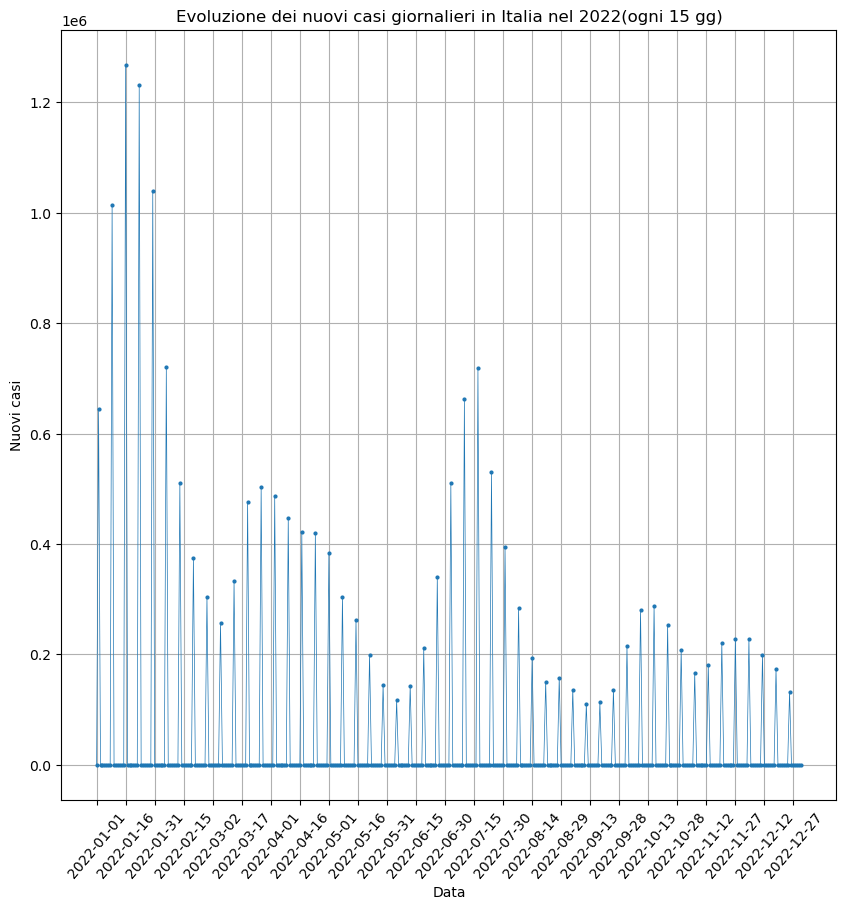

In [15]:
#grafico sull'evoluzione dei nuovi casi giornalieri nell' anno 2022
plt.figure(figsize=(10, 10))
plt.plot(Italia_2022['date'], Italia_2022['new_cases'], marker='o', linestyle='-', markersize=2, linewidth=0.5)
plt.title('Evoluzione dei nuovi casi giornalieri in Italia nel 2022(ogni 15 gg)')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(Italia_2022['date'][::15],rotation=50)
plt.grid(True)
plt.show()

In [16]:
#creazione dei tati cumulativi
Italia_2022.loc[:,'cumulative_new_cases'] = Italia_2022['new_cases'].cumsum()
Italia_2022

iso_code continent location        date  total_cases  new_cases  \
167070      ITA    Europe    Italy  2022-01-01    5622431.0        0.0   
167071      ITA    Europe    Italy  2022-01-02    6267035.0   644604.0   
167072      ITA    Europe    Italy  2022-01-03    6267035.0        0.0   
167073      ITA    Europe    Italy  2022-01-04    6267035.0        0.0   
167074      ITA    Europe    Italy  2022-01-05    6267035.0        0.0   
...         ...       ...      ...         ...          ...        ...   
167430      ITA    Europe    Italy  2022-12-27   25060503.0        0.0   
167431      ITA    Europe    Italy  2022-12-28   25060503.0        0.0   
167432      ITA    Europe    Italy  2022-12-29   25060503.0        0.0   
167433      ITA    Europe    Italy  2022-12-30   25060503.0        0.0   
167434      ITA    Europe    Italy  2022-12-31   25060503.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
167070           36797.000      136530.0         0.0              140.857   
167071           92086.286      137513.0       983.0              140.429   
167072           92086.286      137513.0         0.0              140.429   
167073           92086.286      137513.0         0.0              140.429   
167074           92086.286      137513.0         0.0              140.429   
...                    ...           ...         ...                  ...   
167430           18918.143      184168.0         0.0              114.000   
167431           18918.143      184168.0         0.0              114.000   
167432           18918.143      184168.0         0.0              114.000   
167433           18918.143      184168.0         0.0              114.000   
167434           18918.143      184168.0         0.0              114.000   

        ...  handwashing_facilities  hospital_beds_per_thousand  \
167070  ...                     NaN                        3.18   
167071  ...                     NaN                        3.18   
167072  ...                     NaN                        3.18   
167073  ...                     NaN                        3.18   
167074  ...                     NaN                        3.18   
...     ...                     ...                         ...   
167430  ...                     NaN                        3.18   
167431  ...                     NaN                        3.18   
167432  ...                     NaN                        3.18   
167433  ...                     NaN                        3.18   
167434  ...                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
167070            83.51                    0.892  59037472.0   
167071            83.51                    0.892  59037472.0   
167072            83.51                    0.892  59037472.0   
167073            83.51                    0.892  59037472.0   
167074            83.51                    0.892  59037472.0   
...                 ...                      ...         ...   
167430            83.51                    0.892  59037472.0   
167431            83.51                    0.892  59037472.0   
167432            83.51                    0.892  59037472.0   
167433            83.51                    0.892  59037472.0   
167434            83.51                    0.892  59037472.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
167070                                   NaN                          NaN   
167071                              168226.3                        12.99   
167072                                   NaN                          NaN   
167073                                   NaN                          NaN   
167074                                   NaN                          NaN   
...                                      ...                          ...   
167430                                   NaN                          NaN   
167

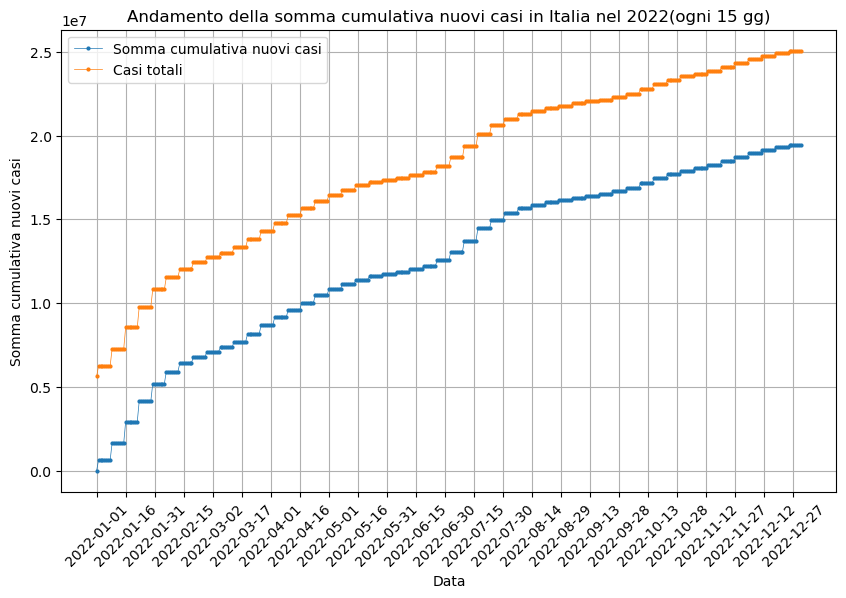

Come si può notare dal grafico vi è una forte similarità tra i dati riguardante la somma cumulativa dei casi e i casi totali, in quanto l incremento dei casi giornalieri contribuisce all aumento dei casi totali.In conseguenza a ciò, aumentando i casi giornalieri,ci si aspetta un aumento dei casi totali


In [17]:
#grafico dell'andamento della somma cumulativa dei nuovi casi nel 2022
plt.figure(figsize=(10, 6))
plt.plot(Italia_2022['date'], Italia_2022['cumulative_new_cases'], marker='o', linestyle='-', markersize=2, linewidth=0.5)
plt.plot(Italia_2022['date'], Italia_2022['total_cases'], marker='o', linestyle='-', markersize=2, linewidth=0.5)
plt.legend(['Somma cumulativa nuovi casi', 'Casi totali'])
plt.title('Andamento della somma cumulativa nuovi casi in Italia nel 2022(ogni 15 gg)')
plt.xlabel('Data')
plt.ylabel('Somma cumulativa nuovi casi')
plt.xticks(Italia_2022['date'][::15], rotation=45)  
plt.grid(True)
plt.show()
print('Come si può notare dal grafico vi è una forte similarità tra i dati riguardante la somma cumulativa dei casi e i casi totali, in quanto l incremento dei casi giornalieri contribuisce all aumento dei casi totali.In conseguenza a ciò, aumentando i casi giornalieri,ci si aspetta un aumento dei casi totali')

Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il
numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e
scrivere un breve commento a riguardo;

In [18]:
# Selezione dei dati per le nazioni di Italia, Germania e Francia da maggio 2022 ad aprile 2023
dati_terapia_intensiva = dati_covid_new[(dati_covid_new['location'].isin(['Italy', 'Germany', 'France'])) &
                               (dati_covid_new['date'] >= '2022-05-01') &
                               (dati_covid_new['date'] <= '2023-04-30')]


In [19]:
dati_terapia_intensiva

iso_code continent location        date  total_cases  new_cases  \
117874      FRA    Europe   France  2022-05-01   27742592.0   376510.0   
117875      FRA    Europe   France  2022-05-02   27742592.0        0.0   
117876      FRA    Europe   France  2022-05-03   27742592.0        0.0   
117877      FRA    Europe   France  2022-05-04   27742592.0        0.0   
117878      FRA    Europe   France  2022-05-05   27742592.0        0.0   
...         ...       ...      ...         ...          ...        ...   
167550      ITA    Europe    Italy  2023-04-26   25772459.0        0.0   
167551      ITA    Europe    Italy  2023-04-27   25772459.0        0.0   
167552      ITA    Europe    Italy  2023-04-28   25772459.0        0.0   
167553      ITA    Europe    Italy  2023-04-29   25772459.0        0.0   
167554      ITA    Europe    Italy  2023-04-30   25795509.0    23050.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
117874           53787.143      146744.0       867.0              123.857   
117875           53787.143      146744.0         0.0              123.857   
117876           53787.143      146744.0         0.0              123.857   
117877           53787.143      146744.0         0.0              123.857   
117878           53787.143      146744.0         0.0              123.857   
...                    ...           ...         ...                  ...   
167550            3808.429      189627.0         0.0               26.714   
167551            3808.429      189627.0         0.0               26.714   
167552            3808.429      189627.0         0.0               26.714   
167553            3808.429      189627.0         0.0               26.714   
167554            3292.857      189786.0       159.0               22.714   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
117874  ...          35.6                     NaN                        5.98   
117875  ...          35.6                     NaN                        5.98   
117876  ...          35.6                     NaN                        5.98   
117877  ...          35.6                     NaN                        5.98   
117878  ...          35.6                     NaN                        5.98   
...     ...           ...                     ...                         ...   
167550  ...          27.8                     NaN                        3.18   
167551  ...          27.8                     NaN                        3.18   
167552  ...          27.8                     NaN                        3.18   
167553  ...          27.8                     NaN                        3.18   
167554  ...          27.8                     NaN                        3.18   

        life_expectancy  human_development_index  population  \
117874            82.66                    0.901  67813000.0   
117875            82.66                    0.901  67813000.0   
117876            82.66                    0.901  67813000.0   
117877            82.66                    0.901  67813000.0   
117878            82.66                    0.901  67813000.0   
...                 ...                      ...         ...   
167550            83.51                    0.892  59037472.0   
167551            83.51                    0.892  59037472.0   
167552            83.51                    0.892  59037472.0   
167553            83.51                    0.892  59037472.0   
167554            83.51                    0.892  59037472.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
117874                              89517.72                         6.19   
117875                                   NaN                          NaN   
117876                                   NaN                          NaN   
117877                                   NaN                          NaN   
117878                                   NaN                      

<Figure size 1000x600 with 0 Axes>

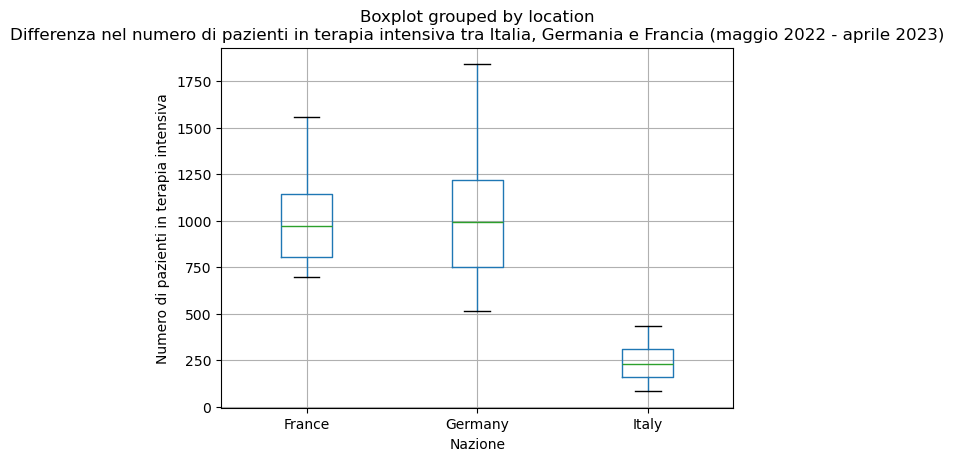

Il boxplot mostra come la nazione Italia ha un numero medio di pazienti più elevato in terapia intensiva rispetto a Germania e Francia, con una variabilità maggiore di casi critici. In Germania notiamo una maggiore stabilità dei pazienti in terapiaintensiva rispetto all Italia. In Francia la situazione sembra essere molto simile a quella della Germania


In [20]:
#Creazione del grafico 
plt.figure(figsize=(10, 6))
dati_terapia_intensiva.boxplot(column='icu_patients', by='location')
plt.title('Differenza nel numero di pazienti in terapia intensiva tra Italia, Germania e Francia (maggio 2022 - aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva')
plt.show()
print('Il boxplot mostra come la nazione Italia ha un numero medio di pazienti più elevato in terapia intensiva rispetto a Germania e Francia, con una variabilità maggiore di casi critici. In Germania notiamo una maggiore stabilità dei pazienti in terapiaintensiva rispetto all Italia. In Francia la situazione sembra essere molto simile a quella della Germania')

Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per
ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [21]:
# Selezione dei dati per le nazioni di Italia, Germania, Francia e Spagna nel 2023
dati_ospedalizzati_2023 = dati_covid_new[(dati_covid_new['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) &
                               (dati_covid_new['date'].str.startswith('2023'))]

dati_ospedalizzati_2023
                                

iso_code continent location        date  total_cases  new_cases  \
118119      FRA    Europe   France  2023-01-01   38141254.0   151707.0   
118120      FRA    Europe   France  2023-01-02   38141254.0        0.0   
118121      FRA    Europe   France  2023-01-03   38141254.0        0.0   
118122      FRA    Europe   France  2023-01-04   38141254.0        0.0   
118123      FRA    Europe   France  2023-01-05   38141254.0        0.0   
...         ...       ...      ...         ...          ...        ...   
329217      ESP    Europe    Spain  2023-12-27   13980340.0        NaN   
329218      ESP    Europe    Spain  2023-12-28   13980340.0        NaN   
329219      ESP    Europe    Spain  2023-12-29   13980340.0        NaN   
329220      ESP    Europe    Spain  2023-12-30   13980340.0        NaN   
329221      ESP    Europe    Spain  2023-12-31   13980340.0        NaN   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
118119           21672.429      162475.0       808.0              115.429   
118120           21672.429      162475.0         0.0              115.429   
118121           21672.429      162475.0         0.0              115.429   
118122           21672.429      162475.0         0.0              115.429   
118123           21672.429      162475.0         0.0              115.429   
...                    ...           ...         ...                  ...   
329217                 NaN      121852.0         NaN                  NaN   
329218                 NaN      121852.0         NaN                  NaN   
329219                 NaN      121852.0         NaN                  NaN   
329220                 NaN      121852.0         NaN                  NaN   
329221                 NaN      121852.0         NaN                  NaN   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
118119  ...          35.6                     NaN                        5.98   
118120  ...          35.6                     NaN                        5.98   
118121  ...          35.6                     NaN                        5.98   
118122  ...          35.6                     NaN                        5.98   
118123  ...          35.6                     NaN                        5.98   
...     ...           ...                     ...                         ...   
329217  ...          31.4                     NaN                        2.97   
329218  ...          31.4                     NaN                        2.97   
329219  ...          31.4                     NaN                        2.97   
329220  ...          31.4                     NaN                        2.97   
329221  ...          31.4                     NaN                        2.97   

        life_expectancy  human_development_index  population  \
118119            82.66                    0.901  67813000.0   
118120            82.66                    0.901  67813000.0   
118121            82.66                    0.901  67813000.0   
118122            82.66                    0.901  67813000.0   
118123            82.66                    0.901  67813000.0   
...                 ...                      ...         ...   
329217            83.56                    0.904  47558632.0   
329218            83.56                    0.904  47558632.0   
329219            83.56                    0.904  47558632.0   
329220            83.56                    0.904  47558632.0   
329221            83.56                    0.904  47558632.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
118119                             122180.83                         6.64   
118120                                   NaN                          NaN   
118121                                   NaN                          NaN   
118122                                   NaN                          NaN   
118123                                   NaN                      

In [22]:
# Sostituzione dei dati nulli 
dati_ospedalizzati_2023 = dati_ospedalizzati_2023.fillna(0)
dati_ospedalizzati_2023
#E' possibile gestire i dati senza la sostituzione dei valori nan ad esempio usando la funzione 
#dropna qualora questi siano pochi e non influenzino il risultato finale.

iso_code continent location        date  total_cases  new_cases  \
118119      FRA    Europe   France  2023-01-01   38141254.0   151707.0   
118120      FRA    Europe   France  2023-01-02   38141254.0        0.0   
118121      FRA    Europe   France  2023-01-03   38141254.0        0.0   
118122      FRA    Europe   France  2023-01-04   38141254.0        0.0   
118123      FRA    Europe   France  2023-01-05   38141254.0        0.0   
...         ...       ...      ...         ...          ...        ...   
329217      ESP    Europe    Spain  2023-12-27   13980340.0        0.0   
329218      ESP    Europe    Spain  2023-12-28   13980340.0        0.0   
329219      ESP    Europe    Spain  2023-12-29   13980340.0        0.0   
329220      ESP    Europe    Spain  2023-12-30   13980340.0        0.0   
329221      ESP    Europe    Spain  2023-12-31   13980340.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
118119           21672.429      162475.0       808.0              115.429   
118120           21672.429      162475.0         0.0              115.429   
118121           21672.429      162475.0         0.0              115.429   
118122           21672.429      162475.0         0.0              115.429   
118123           21672.429      162475.0         0.0              115.429   
...                    ...           ...         ...                  ...   
329217               0.000      121852.0         0.0                0.000   
329218               0.000      121852.0         0.0                0.000   
329219               0.000      121852.0         0.0                0.000   
329220               0.000      121852.0         0.0                0.000   
329221               0.000      121852.0         0.0                0.000   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
118119  ...          35.6                     0.0                        5.98   
118120  ...          35.6                     0.0                        5.98   
118121  ...          35.6                     0.0                        5.98   
118122  ...          35.6                     0.0                        5.98   
118123  ...          35.6                     0.0                        5.98   
...     ...           ...                     ...                         ...   
329217  ...          31.4                     0.0                        2.97   
329218  ...          31.4                     0.0                        2.97   
329219  ...          31.4                     0.0                        2.97   
329220  ...          31.4                     0.0                        2.97   
329221  ...          31.4                     0.0                        2.97   

        life_expectancy  human_development_index  population  \
118119            82.66                    0.901  67813000.0   
118120            82.66                    0.901  67813000.0   
118121            82.66                    0.901  67813000.0   
118122            82.66                    0.901  67813000.0   
118123            82.66                    0.901  67813000.0   
...                 ...                      ...         ...   
329217            83.56                    0.904  47558632.0   
329218            83.56                    0.904  47558632.0   
329219            83.56                    0.904  47558632.0   
329220            83.56                    0.904  47558632.0   
329221            83.56                    0.904  47558632.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
118119                             122180.83                         6.64   
118120                                  0.00                         0.00   
118121                                  0.00                         0.00   
118122                                  0.00                         0.00   
118123                                  0.00                      

In [23]:
# Somma dei pazienti ospedalizzati per ogni nazione nel 2023
somma_ospedalizzati_per_nazione = dati_ospedalizzati_2023.groupby('location')['hosp_patients'].sum()
print("Somma dei pazienti ospedalizzati per nazione nel 2023:")
print(somma_ospedalizzati_per_nazione)

Somma dei pazienti ospedalizzati per nazione nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64
